###Arrange the given linear transformations in a hierarchal order, with the most general case listed first (Affine, Euclidean, Similarity, Projective). For each of these transformations, list two permissible operations, one preserved quantity, and the degrees of freedom (in both 2D and 3D).

I'm listing the order of the four transformation with decreasing generality:
Project > Affine > Similarity > Eucidean


For Projective transformation,it includes rotation,scaling and so on.It's the most general transformation among these four,other transformation like affine transformation is just the special case of projective transformation. One preserved quantity is that line after projective transformation is also line, but no parallelism is guaranteed.Moreover,lengths and angles might be distorted too. A 2D projective transformation has 8 degrees of freedom.In 3D,there are 15 degree of freedom.

For Affine transformation,two permissible operations are translation and scaling. The preserved quantity during affine transformation is that the points in the same line before transformation will still be in the same line afterward.Parallel lines are still parallel lines,and straight line remain straight.However,Angles are not preserved. In 2D,the degree of freedom is 6. While in 3D, it's 12. 

Similarity transformation is a subset of Affine transformation, it includes rotation and translaiton. Angles between lines, ratio of two lengths, ratio of areas are invariant under similarity transformation. Generally, it preserves the shape of the object.In 2D image processing,a similarity transformation has 4 degree of freedom.While in 3D, it's 7 degree.

The last case is Euclidean Transformations,and it's a subset of Similarity transformation.It describes the shape of object rigidly. Two permissible operation include rotation and translation. Under Euclidean transformations,angles between lines, length between two points, and area are invariant.Parallism is guarenteed. In 2D, it has 3 degree of freedom. And in 3D, there dof is 6 degree.

###With reference to the above equation, derive a T matrix (3X2) to perform the following operations:
###a) Scale an image by 1.7 times


In [1]:
%pylab inline
import IP

Populating the interactive namespace from numpy and matplotlib


In [3]:
I = IP.data.coffee()
shape(I)

(400, 600, 3)

In [31]:
T_scaling = array([[1.7,0,0],[0,1.7,0],[0,0,1]])
T_scaling

array([[ 1.7,  0. ,  0. ],
       [ 0. ,  1.7,  0. ],
       [ 0. ,  0. ,  1. ]])

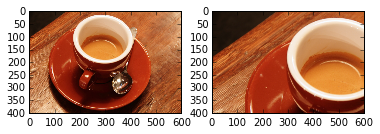

In [22]:
subplot(121);imshow(I,cmap='gray');
I_scaling = IP.warp(I,T_scaling)
subplot(122);imshow(I_scaling,cmap='gray')

In this way, new coordinate (u,v) can be expressed in this way: u = 1.7x, v = 1.7y. Thus scaling the image by 1.7 times

###b) Rotate an image by 21∘

array([[ 0.93358043, -0.35836795,  0.        ],
       [ 0.35836795,  0.93358043,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

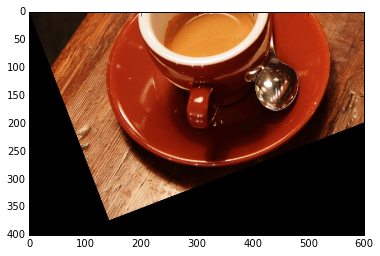

In [6]:
T_rotation = array([[cos(radians(21)),-sin(radians(21)),0],[sin(radians(21)),cos(radians(21)),0],[0,0,1]])
I_rotation = IP.warp(I,T_rotation)
imshow(I_rotation,cmap='gray')
T_rotation

u = xcos(α)-ysin(α);
v = xsin(α)+ysin(α);And here α=21 degree

###c) Translate an image by (50, 60) pixels in (x, z) directions respectively.

In [23]:
T_translation = array([[1,0,50],[0,1,60],[0,0,1]])

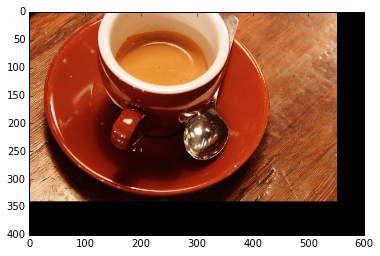

In [16]:
I_translation = IP.warp(I,T_translation)
imshow(I_translation,cmap='gray')

In this way, u = x + 50 , v = y + 60.Actually when I am doing to matrix operation, I think the ‘50’and '60' should be in the third row of the matrix. But it just doesn't work. The distance of translation has to be in the third column. 

###d) All the above together

array([[  1.58708673,  -0.60922551,  50.        ],
       [  0.60922551,   1.58708673,  60.        ],
       [  0.        ,   0.        ,   1.        ]])

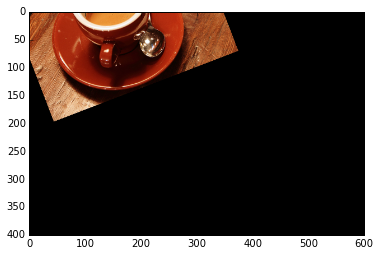

In [29]:
T_all = array([[1.7*cos(radians(21)),-1.7*sin(radians(21)),50],[1.7*sin(radians(21)),1.7*cos(radians(21)),60],[0,0,1]])
I_all = IP.warp(I,T_all)
imshow(I_all,cmap='gray')
T_all

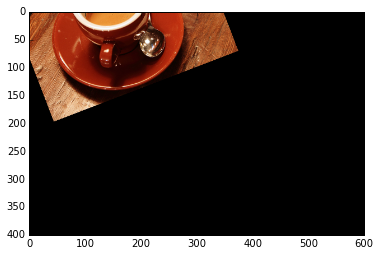

In [30]:
T1 = IP.AffineTransform(translation=(50,60),rotation=radians(21),scale=(1.7,1.7))
I1 = IP.warp(I,T1)
imshow(I1,cmap='gray')

Compared the result with the result we get from the built_in function, we can see that the effect is the same.

## Polynomial transfrom One

First We build a 10*10 checkerboard

In [2]:
checkerboard = zeros([100,100])
subboard = ones([10,10])
for i in range(0,10):
    if i % 2 == 0:
        for j in range(0,10,2):
            checkerboard[(i*10):(i*10+10),(j*10):(10*j+10)]=subboard
    elif i % 2 ==1:
        for j in range(1,10,2):
            checkerboard[(i*10):(i*10+10),(j*10):(10*j+10)]=subboard
            

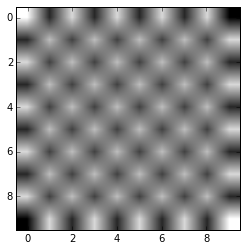

In [3]:
from skimage.transform import PolynomialTransform 
II = checkerboard
II.shape
II = IP.imresize(II,(10,10))
imshow(II,cmap='gray')

First put the coefficient of those two equation into $2*N$ array, where $N * 2 = (order + 1) * (order + 2)$.So here $N = (2+1)*(2+2)/2=6$. And these six pairs of points are determined by:

\begin{align}
X = \sum_{j=0}^2\sum_{i=0}^j(a_{ji}*x^{(j-i)}*y^i)\\
Y = \sum_{j=0}^2\sum_{i=0}^j(b_{ji}*x^{(j-i)}*y^i)
\end{align}

In other words, the variables inside the function is choosen in the order:
$a_{00},a_{10}x,a_{11}y,a_{20}x^2,a_{21}xy,a_{22}y^2,a_{30}x^3,a_{31}x^2y,a_{32}xy^2,a_{33}y^3$.Based on this order, I can choose the coefficient matrix that later I will put inside the funciton 'PolynomialTransform'

As I have resize the image to 10*10, the size of the new image will be decided by the given equation,so I substitute x = 10 and y = 10 to the equation below and get 2155 and 2929

In [4]:
T_coefficient = array([[5,99],[2,2],[3,1],[0,9],[21,7],[0,12]])
T_coefficient.T

array([[ 5,  2,  3,  0, 21,  0],
       [99,  2,  1,  9,  7, 12]])

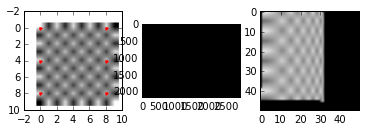

In [5]:
src = array([[0,0],[0,20],[0,40],[30,0],[30,20],[30,40]])
dst = array([[0,0],[0,4],[0,8],[8,0],[8,4],[8,8]])

# The three lines below is to do transformation on the whole image. As only 100 points got value, and the image
# is expanded to the size about 2155*2929,those points which don't have value are showed as dark area. 
T_polynomial = PolynomialTransform(params=T_coefficient.T)
I_polynomial = IP.warp(II,T_polynomial,output_shape=[2155,2929])
imshow(I_polynomial,cmap='gray')


# Unlike the method above, this mathod only choose certain points(dst) in the original image to do transform.
# And the 'scr' refers to the coordinate of new image. 
T_polynomial1 = PolynomialTransform(params=T_coefficient.T)
T_polynomial1.estimate(src,dst,order=2)
I_polynomial1 = IP.warp(II,T_polynomial1,output_shape=[50,50])

subplot(131);imshow(II,cmap='gray');plot(dst[:,0],dst[:,1],'.r')
subplot(132);imshow(I_polynomial,cmap='gray')
subplot(133);imshow(I_polynomial1,cmap='gray')

## Polynomial transfrom Two

I decided to use taylor series to expand sin( )/cos( )/log( )at first:

\begin{align}
sin(x)&=x - \frac{x^3}{3!}\\
cos(x)&=1-\frac{x^2}{2!}\\
log(1+x)&=x-\frac{x^2}{2}+\frac{x^3}{3}\\
log(1-y)&=-y-\frac{y^2}{2}-\frac{y^3}{3}
\end{align}

Therefore, we can express [u,v] in this way:

\begin{align}
u &= 0.01 - 0.5x + 0.5x^2 - \frac{5}{12}x^3 - \frac{y^2}{400}\\
v &= 0.08 + 0.1x - \frac{1}{60}x^3+y+\frac{12}{25}y^2+\frac{y^3}{3}
\end{align}

This time, 10 pairs of points are chosen. 

In [6]:
T_coefficient2 = array(([0.01,0.08],[-0.5,0.1],[0,1],[0.5,0],[0,0],[-1/400,12/25],[-5/12,-1/60],[0,0],[0,0],[0,1/3]))
shape(T_coefficient2.T)

(2, 10)

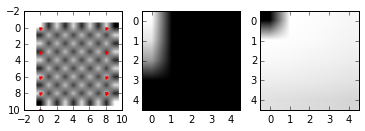

In [10]:
src2 = array([[0,0],[0,2],[0,4],[0,6],[0,8],[8,0],[8,2],[8,4],[8,6],[8,8]])
dst2 = array([[0,0],[0,3],[0,6],[0,8],[0,10],[8,0],[8,3],[8,6],[8,8],[8,8]])

# Create a transformation matrix and set the coefficient, which has stored in T_coefficient2
T_polynomial2 = PolynomialTransform(params=T_coefficient2.T)
I_polynomial2 = IP.warp(II,T_polynomial2,output_shape=[5,5])

# Unlike the methods above,which do the transformation to the whole image
# the method below select certain points to do the transformaiton.
T_polynomial3 = PolynomialTransform(params=T_coefficient2.T)
T_polynomial3.estimate(src,dst,order=3)
I_polynomial3 = IP.warp(II,T_polynomial3,output_shape=[5,5])

subplot(131);imshow(II,cmap='gray');plot(dst2[:,0],dst2[:,1],'.r')
subplot(132);imshow(I_polynomial2,cmap='gray')
subplot(133);imshow(I_polynomial3,cmap='gray')

##Projective transformation

In [111]:
from skimage.transform import ProjectiveTransform
shape(book)

(571, 1002, 3)

(-0.5, 299.5, 379.5, -0.5)

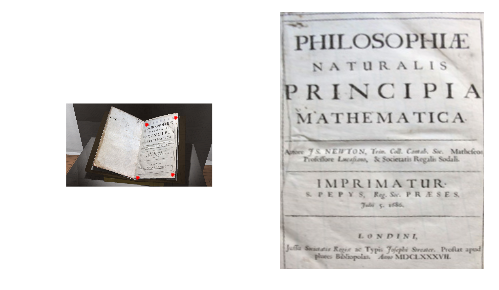

In [115]:
book = IP.imread('Projective_book.jpg')

# Specify the coordinate that we would like to take projection from(origin),and the area 
# we would like to place our projection(destinaiton)

origin = np.array(((0, 0),(0, 400),(300, 400),(300, 0)))
destinaiton = np.array(((550, 140),(490, 500),(730, 480),(750, 90)))

# Do projective transformaiton on the input image,as we only need to project the text in the image
# So we use 'estimate' to specify the parameters.
T_projection = ProjectiveTransform()
T_projection.estimate(origin,destinaiton)
I_pro = IP.warp(book, T_projection,output_shape=(380, 300))

# Show the image after projection and point out the area we take projection from
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 10))
ax1.imshow(book)
ax1.plot(destinaiton[:, 0],destinaiton[:, 1],'.r')
ax1.axis('off')
ax2.imshow(I_pro)
ax2.axis('off')